# Import the Libraries

In [9]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs

# Set a random seed

In [10]:
np.random.seed(0)

# Set up random dataset with n_samples, the given centers and standard deviation of the clusters

In [11]:
#make_blobs() : Generate isotropic Gaussian blobs for clustering

#n_samples : It is the total number of points equally divided among clusters

#centers : The number of centers to generate, or the fixed center locations

#cluster_std : The standard deviation of the clusters

X , y = make_blobs( n_samples = 5000, centers = [[-3,-2],[-1,0],[2,3]], cluster_std =  0.9 )

#X : The generated samples.

print(X)

#y : The integer labels for cluster membership of each sample.

print(y)

[[-0.82150565  1.07098024]
 [ 2.16732621  3.06800392]
 [-2.1534842  -0.26075305]
 ...
 [-3.70227397 -1.75599848]
 [-0.69503125  0.70020319]
 [-2.64362141 -0.36964487]]
[1 2 1 ... 0 1 0]


# Display the scatter plot of the randomly generated data


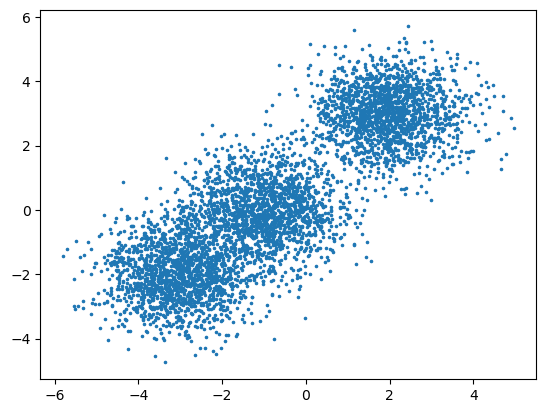

In [12]:
#scatter(): A scatter plot of y vs. x with varying marker size and/or color

#X[:,0] : first data column

#X[:,1] : second data column

#s : size

#marker : shape and marker style

plt.scatter(X[:,0],X[:,1], s=10,marker=".")

plt.show()

# Find the best and efficient cluster number with the help of SSE

In [13]:
k_rng = range(1,10)

SSE = []

for k in range(1,10):
    
    KM = KMeans(n_clusters = k)
    
    KM.fit(X)
    
    SSE.append(KM.inertia_)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

# Display the k vs. SSE plot

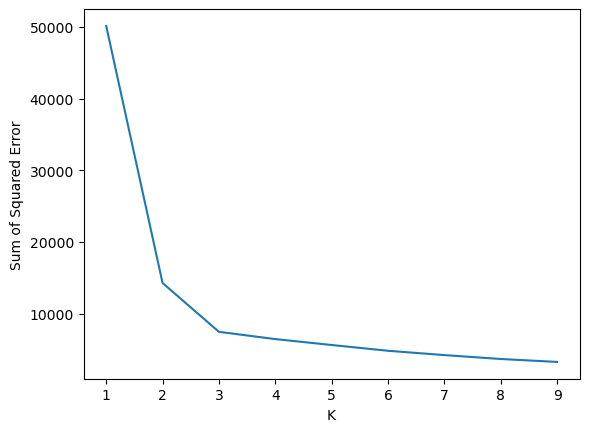

In [15]:
plt.xlabel('K')

plt.ylabel('Sum of Squared Error')

plt.plot(k_rng,SSE)

#as the elbow method we have figured out the k value = 3 is efficient and best k value, we can use this number of clusters in the K-Means setting up.

# Set up K-Means

In [16]:
#init : Initialization method of the centroids

#n_clusters : The number of clusters to form as well as the number of centroids to generate.

#n_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

k_means = KMeans(init="k-means++", n_clusters = 3, n_init = 12)

# Fit the KMeans model with the feature matrix X 



In [17]:
k_means.fit(X)

KMeans(n_clusters=3, n_init=12)

In [18]:
#as a result of k_mean.fit(X), we have k_means.labels_, which are the labels for each point in the model using KMeans'
kmeanlabels = k_means.labels_

kmeanlabels


array([2, 1, 2, ..., 0, 2, 0])

In [19]:
#as a result of k_mean.fit(X), we get the coordinates of the cluster centers using KMeans, k_means.labels_

kmeancenters = k_means.cluster_centers_

kmeancenters

array([[-3.07388813, -2.0311002 ],
       [ 1.97336878,  2.98723926],
       [-0.95433137,  0.01520006]])

# Display the result plot

The k: 0 , my_numbers: [False False False ...  True False  True] cluster_centers: [-3.07388813 -2.0311002 ] colors  [0.61960784 0.00392157 0.25882353 1.        ]
The k: 1 , my_numbers: [False  True False ... False False False] cluster_centers: [1.97336878 2.98723926] colors  [0.99807766 0.99923106 0.74602076 1.        ]
The k: 2 , my_numbers: [ True False  True ... False  True False] cluster_centers: [-0.95433137  0.01520006] colors  [0.36862745 0.30980392 0.63529412 1.        ]


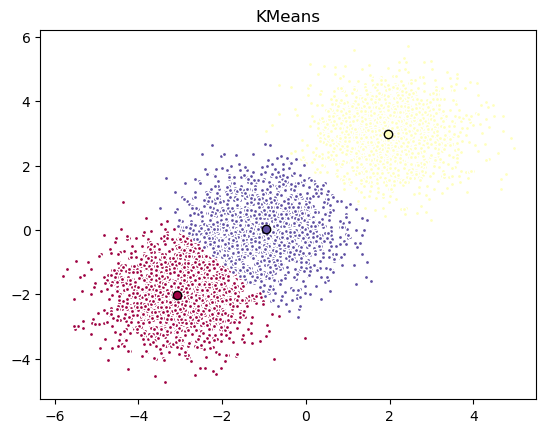

In [27]:
# Initialize the plot with the default dimensions.

fig = plt.figure()

#Create a plot

ax1 = fig.add_subplot(1,1,1)

#Colors uses a color map, which will produce an array of colors based on the number of labels there are. We use set(k_means_labels) to get the unique labels.

colors = plt.cm.Spectral(np.linspace(0,1,len(set(kmeanlabels))))

# For loop that plots the data points and centroids.k will range from 0-2, which will match the possible clusters that each data point is in.

for k,col in zip(range(len([[-3,-2],[-1,0],[2,3]])), colors):

    # Create a list of all data points, where the data points that are in the cluster (ex. cluster 0) are labeled as true, else they are labeled as false.
    
    my_numbers = (kmeanlabels==k)
    
    # Define the centroid, or cluster center
    
    cluster_centers = kmeancenters[k]
    
    #print the following details for better understanding, not necessary
    
    print("The k:",k,", my_numbers:",my_numbers,"cluster_centers:",cluster_centers, "colors ",col)

    # Plots the datapoints with color col.
    
    ax1.plot(X[my_numbers,0],X[my_numbers,1],'w',markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline

    ax1.plot(cluster_centers[0],cluster_centers[1],'o', markerfacecolor = col, markeredgecolor='k')

# Title of the plot

ax1.set_title('KMeans')

# Show the plot

plt.show()